In [2]:
#library
import pandas as pd
import numpy as np
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

<H1>Dataset : Breast Cancer

In [3]:
df = pd.read_csv("../dataset/breast_cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [28]:
#turn M = 1 B = 0
df["diagnosis"] = df['diagnosis'].apply(lambda i : 1 if i == 'M' else 0)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


<h1>Features

In [4]:
features = df.columns.tolist()[2:-1]
features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [5]:
X = df.iloc[:,2:-1]
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
label = [col for col in df.columns if col == 'diagnosis']
label

['diagnosis']

In [29]:
y = df['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [9]:
num_feats = X.shape[1]
num_feats

30

<AxesSubplot:>

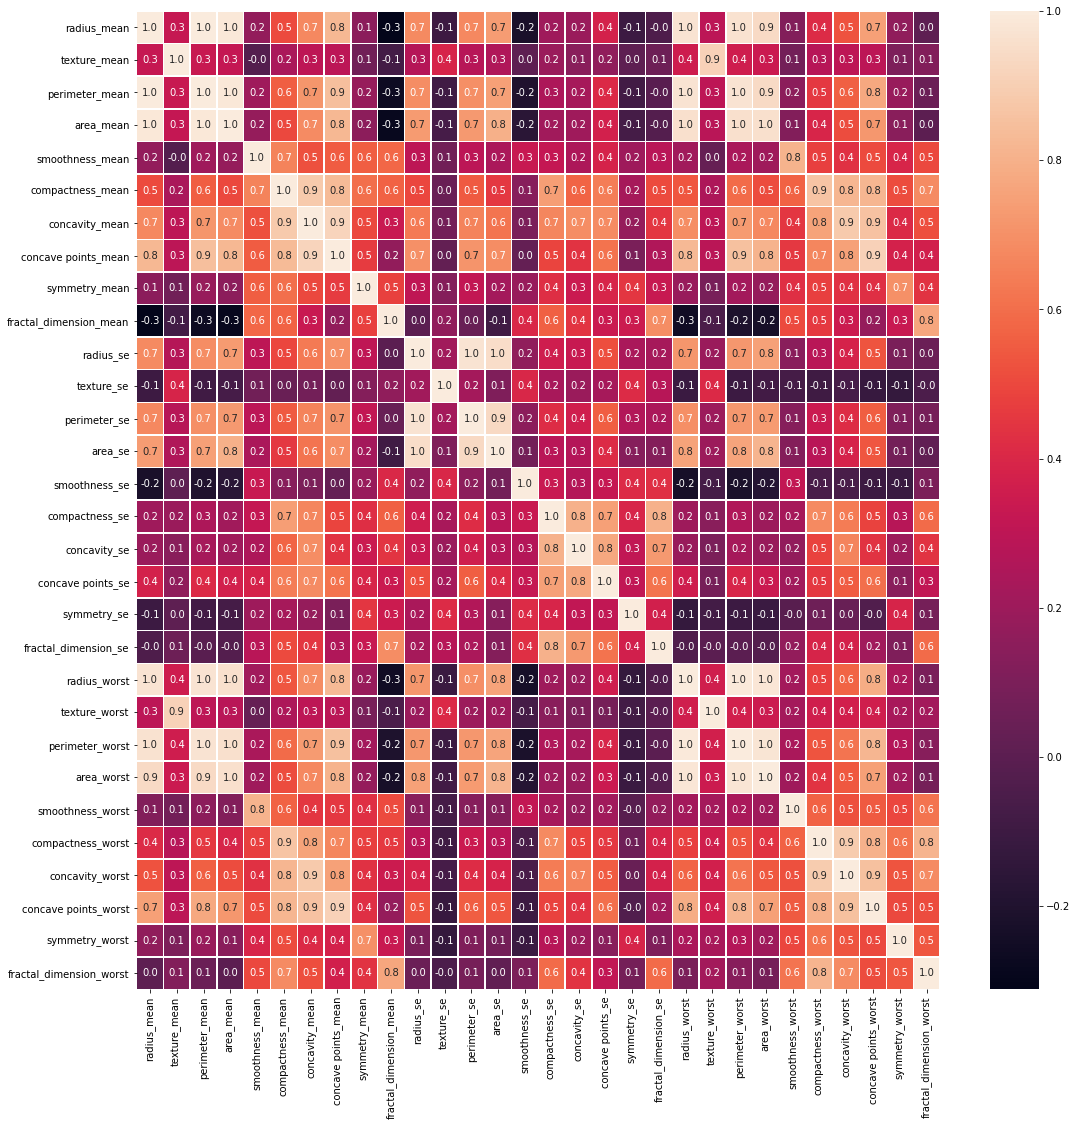

In [30]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [31]:
X.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


<AxesSubplot:>

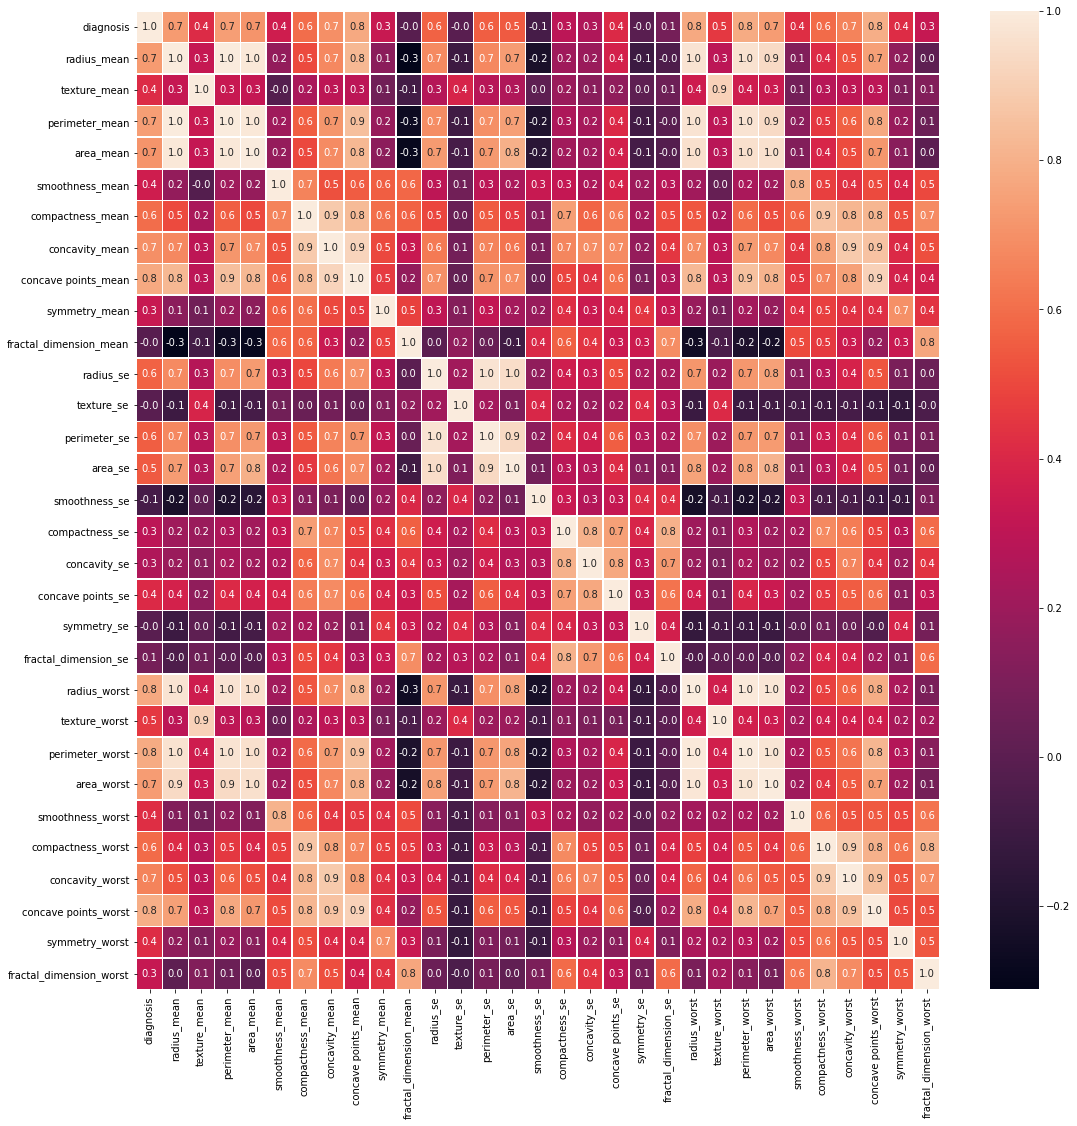

In [33]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.iloc[:,1:-1].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [34]:
df.iloc[:,1:-1].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [12]:
def grouping_attribute_score(attrubutes, value):
    '''combine value to dictionary format'''
    return {"attributes": attrubutes, "value": value}

In [13]:
def find_best_subset(subset_score):
    """find best score of subset"""
    #still available for only a group of attributes
    print('========================================== find max value ===================================')
    best_subset_score = []
    current_best_score_index = (0,0)
    for subset in subset_score:
#         print('index: ', subset_score.index(subset))
#         print('current best score:', current_best_score_index[0])
#         print('current subset score', subset['value'])
        if subset['value'] > current_best_score_index[0]:
#             print('new max score')
            current_best_score_index = (subset['value'],(subset_score.index(subset)))
#             print(current_best_score_index)

    best_subset_score.append(subset_score[current_best_score_index[1]])
    print(best_subset_score)
    print("=============================================================================================")
    return best_subset_score
# return [{'attrubute': ('Glucose', 'BMI'), 'value': 0.3796380304756596}]

In [14]:
def cal_best(algo_round):
    '''match all subset and find the best one'''
    #start calculating
    subset_score = []
    subset_mean = []
    
    #use mean of all correlation of subset
    for atrs in algo_round:
        temp_score_mean = []
        for i in atrs:
            cor = np.corrcoef(X[i], y)[0, 1]
            temp_score_mean.append(cor)
        subset_mean.append(np.mean(temp_score_mean)) #score
        
    for atrs,mean_score in zip(algo_round,subset_mean):
        subset_score.append(grouping_attribute_score(atrs, mean_score))
    [print(i) for i in subset_score]
    return find_best_subset(subset_score=subset_score)

<h1>SFS

In [15]:
best_subset_per_round = []
for num in range(2, num_feats+1):
    print("========================================== Subset_Score Round", num-1,'=============================')
    if num == 2: #1st round
        sfs_round = list(itertools.combinations(X, num))

        print()        
        best_subset_per_round.append(cal_best(algo_round=sfs_round))
        print()
        
    else: #other round
        sfs_round = list(itertools.combinations(X, num))
        
        #hv to pop non best_subset out
        sfs_round_temp = []
        for i in range(len(sfs_round)):
            if all(attr in sfs_round[i] for attr in best_subset_per_round[num-3][0]['attributes']):
                sfs_round_temp.append(sfs_round[i])
        sfs_round = sfs_round_temp
        
        print()
        best_subset_per_round.append(cal_best(algo_round=sfs_round))
        print()       
        
print()
print('best_subset_per_round :',"\n", '=============== SubsetRanking ===============')
# [print(i) for i in best_subset_per_round]

best_temp = [i[0] for i in best_subset_per_round]
best_subset_per_round = best_temp
best_subset_per_round.sort(key=lambda x: x['value'], reverse=True)
best_subset_per_round

========================================== Subset_Score Round 1 =============================

{'attributes': ('radius_mean', 'texture_mean'), 'value': 0.5726069056103298}
{'attributes': ('radius_mean', 'perimeter_mean'), 'value': 0.7363320205506441}
{'attributes': ('radius_mean', 'area_mean'), 'value': 0.7195061739804225}
{'attributes': ('radius_mean', 'smoothness_mean'), 'value': 0.5442942382306937}
{'attributes': ('radius_mean', 'compactness_mean'), 'value': 0.6632810944418541}
{'attributes': ('radius_mean', 'concavity_mean'), 'value': 0.7131941092736804}
{'attributes': ('radius_mean', 'concave points_mean'), 'value': 0.7533211756979452}
{'attributes': ('radius_mean', 'symmetry_mean'), 'value': 0.5302635328190013}
{'attributes': ('radius_mean', 'fractal_dimension_mean'), 'value': 0.3585954543385117}
{'attributes': ('radius_mean', 'radius_se'), 'value': 0.6485811661000864}
{'attributes': ('radius_mean', 'texture_se'), 'value': 0.3608625892007892}
{'attributes': ('radius_mean', 'perim


{'attributes': ('radius_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst'), 'value': 0.7719152568611913}
{'attributes': ('texture_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst'), 'value': 0.708946614555141}
{'attributes': ('perimeter_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst'), 'value': 0.7744366605312666}
{'attributes': ('area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst'), 'value': 0.7677063219031781}
{'attributes': ('smoothness_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst'), 'value': 0.6976215476032865}
{'attributes': ('compactness_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst'), 'value': 0.7452162900877507}
{'attributes': ('concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'concave points_worst'), 'value': 0.765


{'attributes': ('radius_mean', 'perimeter_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'), 'value': 0.7622909784218342}
{'attributes': ('texture_mean', 'perimeter_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'), 'value': 0.7173133767746555}
{'attributes': ('perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'), 'value': 0.7592845963089676}
{'attributes': ('perimeter_mean', 'smoothness_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'), 'value': 0.7092240432376166}
{'attributes': ('perimeter_mean', 'compactness_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'), 'value': 0.7432202878693766}
{'attributes': ('perimeter_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_


{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'), 'value': 0.7178006650426036}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'), 'value': 0.7115089611804623}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'), 'value': 0.7379504847829425}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst'), 'value': 0.7490422658566814}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'concave points_mean', 'symmetry_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concave points_worst')


{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.7105614457204155}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.7054136880150271}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.7270476618716017}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.7028626506674467}
{'attributes': ('radius_mea

{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.6925929090980473}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.6882371141165649}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.6860785440532275}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'fractal_dimension_mean', '


{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.6751321561687209}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.6713571338514362}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.6694863731298771}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 


{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.6548306531885669}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'), 'value': 0.6514997511439038}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst'), 'value'


{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst'), 'value': 0.6299936987537187}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst'), 'value': 0.6270134179769149}
{'attributes': ('radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_wors


{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst'), 'value': 0.6064991701963377}
{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst'), 'value': 0.6051629125380813}
{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'fractal_dimension_mean', 'r


{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst'), 'value': 0.5675714576385742}
{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst'), 'value': 0.5677685998005114}
{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_m


{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'perimeter_se', 'area_se', 'compactness_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'), 'value': 0.5468405983462755}
{'attributes': ('radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'compactness_se', 'concave points_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'), 'value': 0.5470219691352577}
{

[{'attributes': ('perimeter_worst', 'concave points_worst'),
  'value': 0.7882400771575138},
 {'attributes': ('concave points_mean',
   'perimeter_worst',
   'concave points_worst'),
  'value': 0.7843646647784874},
 {'attributes': ('concave points_mean',
   'radius_worst',
   'perimeter_worst',
   'concave points_worst'),
  'value': 0.7823869432326253},
 {'attributes': ('perimeter_mean',
   'concave points_mean',
   'radius_worst',
   'perimeter_worst',
   'concave points_worst'),
  'value': 0.7744366605312666},
 {'attributes': ('perimeter_mean',
   'concave points_mean',
   'radius_worst',
   'perimeter_worst',
   'area_worst',
   'concave points_worst'),
  'value': 0.7676680562628974},
 {'attributes': ('radius_mean',
   'perimeter_mean',
   'concave points_mean',
   'radius_worst',
   'perimeter_worst',
   'area_worst',
   'concave points_worst'),
  'value': 0.7622909784218342},
 {'attributes': ('radius_mean',
   'perimeter_mean',
   'area_mean',
   'concave points_mean',
   'radius_

<h2> The Best Candidate Subset by SFS

In [16]:
find_best_subset(best_subset_per_round)

========================================== find max value ===================================
[{'attributes': ('perimeter_worst', 'concave points_worst'), 'value': 0.7882400771575138}]


[{'attributes': ('perimeter_worst', 'concave points_worst'),
  'value': 0.7882400771575138}]